ANOVA F-statistic: 11.576, P-value: 0.000


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Product_1038 Product_1069   0.1703    1.0 -0.3894    0.73  False
Product_1038  Product_107  -0.3676  0.969 -0.9272  0.1921  False
Product_1038 Product_1085    0.417 0.7779 -0.1427  0.9766  False
Product_1038 Product_1092    0.472 0.3907 -0.0877  1.0317  False
Product_1038 Product_1114   -0.258    1.0 -0.8177  0.3016  False
Product_1038 Product_1117  -0.1911    1.0 -0.7507  0.3686  False
Product_1038  Product_112   -0.326 0.9984 -0.8857  0.2337  False
Product_1038 Product_1123  -0.3234 0.9987  -0.883  0.2363  False
Product_1038 Product_1131  -0.1807    1.0 -0.7403   0.379  False
Product_1038 Product_1146   0.0377    1.0 -0.5219  0.5974  False
Product_1038 Product_1161   0.0441    1.0 -0.5156  0.6038  False
Product_1038 Product_1191   0.4746 0.3737 -0.0851  1.0342  False
Product_1038 Product_1217

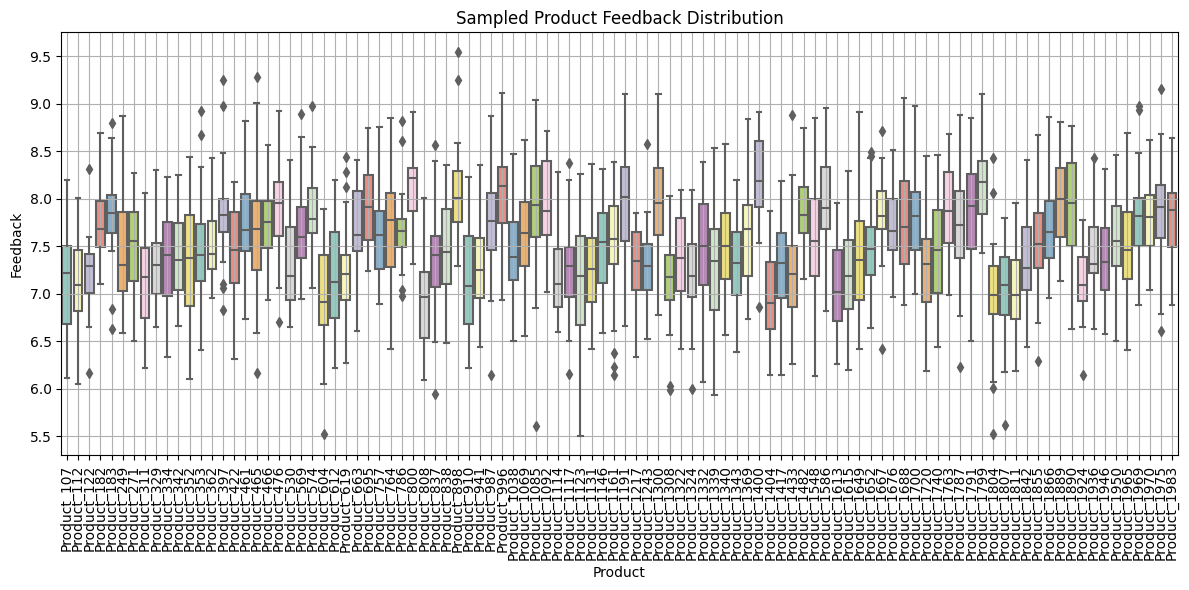

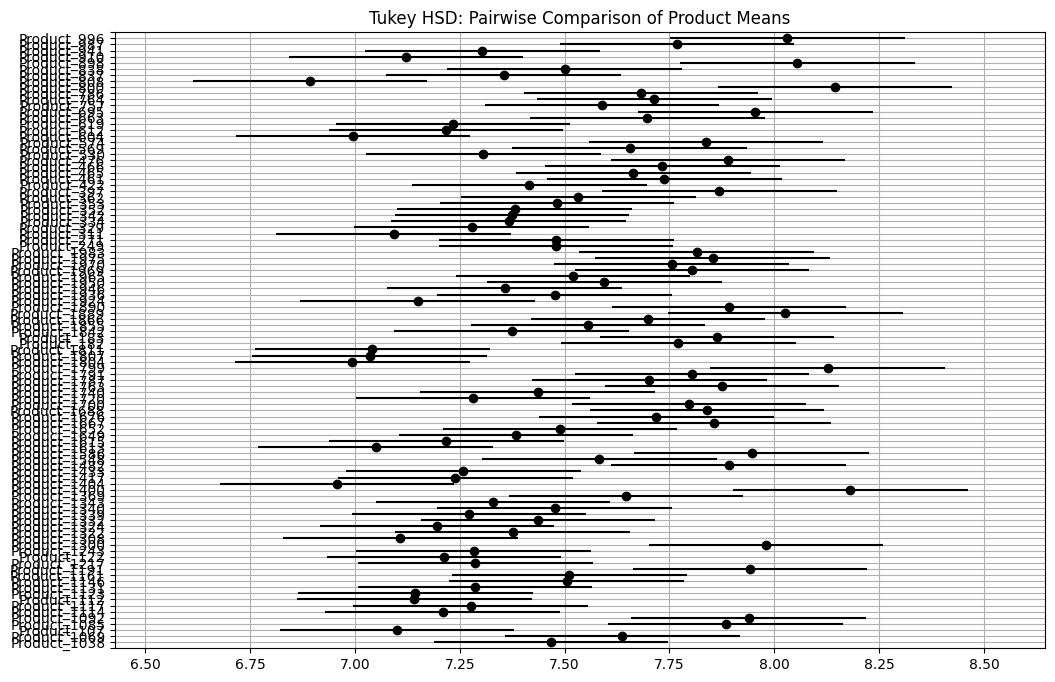

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# STEP 1: Simulate ratings for 2000 products
np.random.seed(42)
n_products = 2000
ratings_per_product = 30

data = []
for i in range(n_products):
    # Inject slightly better performance every 100 products
    mean_rating = 7 + (i % 100) * 0.01  # max ~8.0
    ratings = np.random.normal(loc=mean_rating, scale=0.5, size=ratings_per_product)
    data.extend(zip(ratings, [f'Product_{i+1}'] * ratings_per_product))

df = pd.DataFrame(data, columns=['Feedback', 'Product'])

# STEP 2: Run ANOVA on a sample of 100 random products to reduce computation (optional)
sample_products = np.random.choice(df['Product'].unique(), size=100, replace=False)
df_sample = df[df['Product'].isin(sample_products)]

grouped = [df_sample[df_sample['Product'] == p]['Feedback'] for p in sample_products]
stat, p = f_oneway(*grouped)
print(f"ANOVA F-statistic: {stat:.3f}, P-value: {p:.3f}")

# STEP 3: Tukey HSD - Post-Hoc Test
if p < 0.05:
    tukey = pairwise_tukeyhsd(df_sample['Feedback'], df_sample['Product'])
    print(tukey.summary())

    # STEP 4: Identify Best Products
    result_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    better_pairs = result_df[result_df['reject'] == True]
    
    # Count how often each product was better than others
    top_count = pd.concat([better_pairs['group1'], better_pairs['group2']]).value_counts()
    print("\n🔥 Top performing products (by win count):")
    print(top_count.head(10))

    # STEP 5: Visualization
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Product', y='Feedback', data=df_sample, palette='Set3')
    plt.xticks(rotation=90)
    plt.title("Sampled Product Feedback Distribution")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Tukey plot
    tukey.plot_simultaneous(figsize=(12, 8))
    plt.title("Tukey HSD: Pairwise Comparison of Product Means")
    plt.grid(True)
    plt.show()

else:
    print("❌ No significant difference found between product ratings.")



In [5]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Simulating feedback scores (1–10) for 5 cities
feedback_data = {
    'City': [],
    'Feedback': []
}

cities = ['Chennai', 'Delhi', 'Mumbai', 'Bangalore', 'Hyderabad']
means = [8.0, 7.5, 6.9, 7.8, 7.2]

for city, mean in zip(cities, means):
    feedback = np.random.normal(loc=mean, scale=0.5, size=50)
    feedback_data['City'].extend([city]*50)
    feedback_data['Feedback'].extend(feedback)

df = pd.DataFrame(feedback_data)

# Run ANOVA
grouped = [df[df['City'] == city]['Feedback'] for city in cities]
f_stat, p_val = f_oneway(*grouped)
print(f"ANOVA F-statistic: {f_stat:.3f}, P-value: {p_val:.3f}")


ANOVA F-statistic: 37.519, P-value: 0.000


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Bangalore   Chennai   0.0453   0.99 -0.2199  0.3106  False
Bangalore     Delhi  -0.3331 0.0059 -0.5983 -0.0678   True
Bangalore Hyderabad  -0.5665    0.0 -0.8317 -0.3012   True
Bangalore    Mumbai  -0.9616    0.0 -1.2269 -0.6963   True
  Chennai     Delhi  -0.3784 0.0011 -0.6436 -0.1131   True
  Chennai Hyderabad  -0.6118    0.0  -0.877 -0.3465   True
  Chennai    Mumbai  -1.0069    0.0 -1.2722 -0.7416   True
    Delhi Hyderabad  -0.2334 0.1139 -0.4987  0.0319  False
    Delhi    Mumbai  -0.6285    0.0 -0.8938 -0.3633   True
Hyderabad    Mumbai  -0.3951 0.0005 -0.6604 -0.1299   True
----------------------------------------------------------


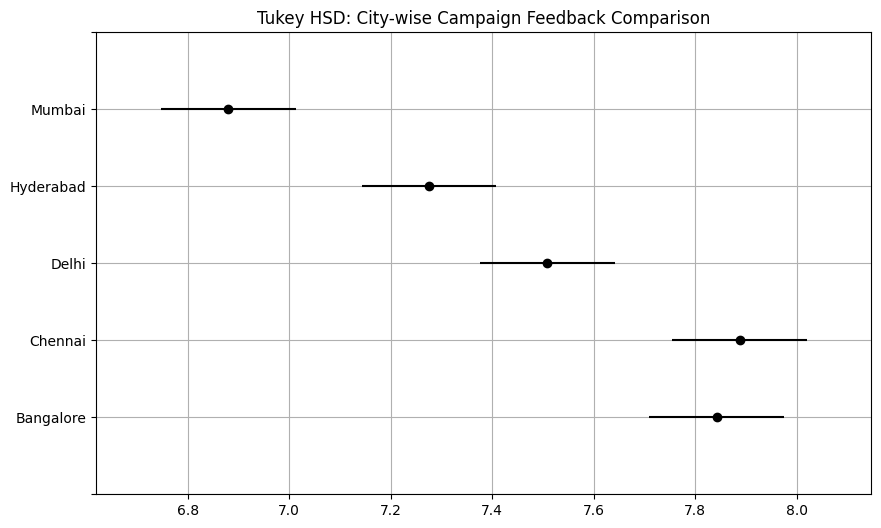

In [6]:
# Tukey HSD Test
tukey = pairwise_tukeyhsd(df['Feedback'], df['City'])
print(tukey)

# Plot
tukey.plot_simultaneous(figsize=(10, 6))
plt.title("Tukey HSD: City-wise Campaign Feedback Comparison")
plt.grid(True)
plt.show()


In [7]:
# Step 1: Get mean feedback per city
city_means = df.groupby("City")["Feedback"].mean().sort_values(ascending=False)

# Step 2: Print top city
top_city = city_means.index[0]
top_score = city_means.iloc[0]

print(f"🏆 Top Performing City: {top_city} with average feedback: {top_score:.2f}")


🏆 Top Performing City: Chennai with average feedback: 7.89
